In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Order by n in site
cases = ['DUP22q11_2','DEL15q11_2','DUP1q21_1','DEL1q21_1','DUP16p11_2','DEL16p11_2','DEL22q11_2','ADHD','ASD','SZ','BIP']

p_baseline = '../../results_reviews/baseline/{}'
p_mtl = '../../results_reviews/mtl/{}'
models = ['mlp','deeper','shorter','wider','thinner']

# Load Data

In [4]:
# Single Task
baseline_models = {}
for model in models:
    st_data = []
    for case in cases:
        folds = []
        for fold in range(5):
            p_parent = os.path.join(p_baseline.format(model), f"{case}/fold_{fold}")
            file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
            folds.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[case])
        st_data.append(folds)

    st_data = dict(zip(cases,st_data))
    baseline_models[model] = st_data

In [5]:
# Multi-task
mtl_models = {}
for model in models:
    mtl_data = []
    for fold in range(5):
        p_parent = os.path.join(p_mtl.format(model), f"fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        mtl_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))
    
    mtl_models[model] = mtl_data


# Get Scores

In [6]:
# Single Task
baseline_models_acc = {}
for model in models:
    st_acc = []
    st_f1 = []
    st_auc = []
    for case in cases:
        # Accuracy
        st_acc.append([baseline_models[model][case][fold]['Accuracy/test'].iloc[-1] for fold in range(5)])

        # F1
        st_f1.append([baseline_models[model][case][fold]['F1/test'].iloc[-1] for fold in range(5)])

        # AUC
        st_auc.append([baseline_models[model][case][fold]['AUC/test'].iloc[-1] for fold in range(5)])

    st_acc = pd.DataFrame(st_acc,index=cases)
    st_acc_std = st_acc.std(axis=1)
    st_acc_mean = st_acc.mean(axis=1)

    st_f1 = pd.DataFrame(st_f1,index=cases)
    st_f1_std = st_f1.std(axis=1)
    st_f1_mean = st_f1.mean(axis=1)

    st_auc = pd.DataFrame(st_auc,index=cases)
    st_auc_std = st_auc.std(axis=1)
    st_auc_mean = st_auc.mean(axis=1)

    baseline_models_acc[model] = st_acc_mean
    # TODO collect other scores

In [7]:
df_base_acc = pd.DataFrame(baseline_models_acc)
df_base_acc['type'] = 'baseline'
df_base_acc

,mlp,deeper,shorter,wider,thinner,type
DUP22q11_2,41.388889,38.888889,38.888889,41.111111,43.611111,baseline
DEL15q11_2,55.354239,56.829268,57.293844,54.866434,55.830430,baseline
DUP1q21_1,53.214286,53.571429,58.571429,50.357143,58.571429,baseline
DEL1q21_1,68.000000,66.000000,68.000000,64.000000,68.000000,baseline
DUP16p11_2,68.571429,65.714286,67.142857,67.142857,62.857143,baseline
DEL16p11_2,71.794872,73.461538,73.333333,68.717949,70.256410,baseline
DEL22q11_2,83.856209,86.143791,84.967320,83.856209,86.143791,baseline
ADHD,56.242879,55.890555,56.242879,56.590705,54.158921,baseline
ASD,63.313070,61.825397,63.099178,60.234155,61.614882,baseline
SZ,76.188484,76.496063,76.342274,75.242372,76.029774,baseline


In [8]:
# Multi-task
mtl_models_acc = {}
for model in models:
    mtl_acc = []
    mtl_f1 = []
    mtl_auc = []
    for fold in range(5):
        df = mtl_models[model][fold].transpose().reset_index()
        
        # Accuracy
        mtl_acc.append(df[df['level_1']=='Accuracy/test'].set_index('level_0')[99])

        # F1
        mtl_f1.append(df[df['level_1']=='F1/test'].set_index('level_0')[99])

        # AUC
        mtl_auc.append(df[df['level_1']=='AUC/test'].set_index('level_0')[99])
        
    mtl_acc = pd.concat(mtl_acc,axis=1)
    mtl_acc_std = mtl_acc.std(axis=1)
    mtl_acc_mean = mtl_acc.mean(axis=1)

    mtl_f1 = pd.concat(mtl_f1,axis=1)
    mtl_f1_std = mtl_f1.std(axis=1)
    mtl_f1_mean = mtl_f1.mean(axis=1)

    mtl_auc = pd.concat(mtl_auc,axis=1)
    mtl_auc_std = mtl_auc.std(axis=1)
    mtl_auc_mean = mtl_auc.mean(axis=1)

    mtl_models_acc[model] = mtl_acc_mean
    #TODO collect other scores

In [9]:
df_mtl_acc = pd.DataFrame(mtl_models_acc)
df_mtl_acc['type'] = 'mtl'
df_mtl_acc

,mlp,deeper,shorter,wider,thinner,type
level_0,,,,,,
ADHD,56.413793,58.499250,52.938531,54.349325,60.413793,mtl
ASD,59.388720,62.783407,62.041540,58.765057,62.565012,mtl
BIP,84.112903,85.403226,79.032258,80.282258,82.802419,mtl
DEL15q11_2,56.318235,55.319396,52.950058,59.721254,50.940767,mtl
DEL16p11_2,65.769231,54.615385,75.128205,65.641026,62.435897,mtl
DEL1q21_1,58.000000,56.000000,64.000000,72.000000,58.000000,mtl
DEL22q11_2,70.915033,78.104575,82.614379,73.267974,86.209150,mtl
DUP16p11_2,58.571429,57.142857,72.857143,57.142857,54.285714,mtl
DUP1q21_1,45.000000,62.142857,60.357143,47.857143,52.142857,mtl


In [10]:
df_master = pd.concat([df_mtl_acc,df_base_acc])
df_master

,mlp,deeper,shorter,wider,thinner,type
ADHD,56.413793,58.499250,52.938531,54.349325,60.413793,mtl
ASD,59.388720,62.783407,62.041540,58.765057,62.565012,mtl
BIP,84.112903,85.403226,79.032258,80.282258,82.802419,mtl
DEL15q11_2,56.318235,55.319396,52.950058,59.721254,50.940767,mtl
DEL16p11_2,65.769231,54.615385,75.128205,65.641026,62.435897,mtl
DEL1q21_1,58.000000,56.000000,64.000000,72.000000,58.000000,mtl
DEL22q11_2,70.915033,78.104575,82.614379,73.267974,86.209150,mtl
DUP16p11_2,58.571429,57.142857,72.857143,57.142857,54.285714,mtl
DUP1q21_1,45.000000,62.142857,60.357143,47.857143,52.142857,mtl
DUP22q11_2,52.500000,50.000000,52.500000,52.777778,34.166667,mtl


# Tables

In [11]:
for model in models:
    print(model)
    print(mtl_models_acc[model].mean())
    print(baseline_models_acc[model].mean())
    print()

mlp
61.96413497453377
65.17604117019783

deeper
63.06224302510154
65.00757382662299

shorter
66.37515344738563
65.60034337698522

wider
63.29744959131556
63.85282108680928

thinner
61.94518818128729
65.04007503489512



# Plots

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_39963/1493770728.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_39963/1493770728.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_39963/1493770728.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_39963/1493770728.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_39963/1493770728.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])


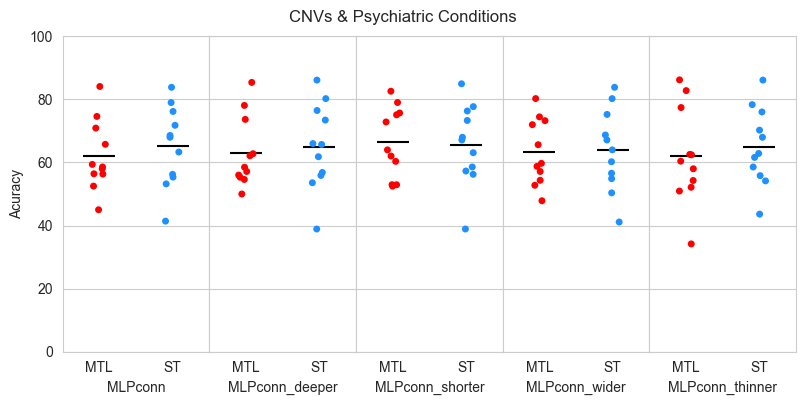

In [12]:
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']
colors = ['red','dodgerblue']
sns.set_style('whitegrid')

fig,ax = plt.subplots(1,5,figsize=(8,4),sharey=True)
for i, model in enumerate(models):
    sns.stripplot(data=df_master, x='type',y=model,hue='type',ax=ax[i],legend=False,palette=colors)
    ax[i].scatter('mtl',df_master[df_master['type']=='mtl'][model].mean(),color='black',marker='_',sizes=[500])
    ax[i].scatter('baseline',df_master[df_master['type']=='baseline'][model].mean(),color='black',marker='_',sizes=[500])
    ax[i].set_xticklabels(['MTL','ST'])
    if model == 'mlp':
        ax[i].set_xlabel(f"MLPconn")
    else:
        ax[i].set_xlabel(f"MLPconn_{model}")
    ax[i].set_xlim(-0.5,1.5)
ax[0].set_ylabel('Acuracy')

plt.suptitle ('CNVs & Psychiatric Conditions')
plt.ylim(0,100)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join('./figures/conditions_model_vars.png'),dpi=300)